### **Import Necessary Modules**

In [10]:
# Import numerical operations library
import numpy as np

# Importing the matplotlib library, which is used for creating static, animated, and interactive visualizations in Python
import matplotlib

# Import plotting library for visualizing images and captions
import matplotlib.pyplot as plt

# Import main Keras package for deep learning
import keras

# Import OpenCV library for image processing
import cv2

# Import regular expressions module for text cleaning
import re

# Import collections module (e.g., for Counter, defaultdict)
import collections

# Import time module to measure performance time
from time import time

# Import pickle module to load/save serialized Python objects
import pickle

# Importing the scikit-learn library, which provides tools for machine learning including classification, regression, clustering, and preprocessing
import sklearn

# Import ResNet50 model and preprocessing method from Keras applications
from keras.applications.resnet50 import ResNet50, preprocess_input

# Import image preprocessing utilities from Keras
from keras.preprocessing import image as IMG

# Import Keras model and utility functions
from keras.models import Model, load_model

# Import sequence padding utility
from keras.preprocessing.sequence import pad_sequences

# Import utility functions for categorical encoding and model visualization
from keras.utils import to_categorical, plot_model

# Import Keras layers for building the model
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Add, BatchNormalization

# Import os module to handle file system operations
import os

# Import utility for splitting data into training and validation sets
from sklearn.model_selection import train_test_split

# Import Keras callbacks for early stopping and saving best model
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Importing the corpus_bleu function and SmoothingFunction class from NLTK's BLEU scoring module
# - corpus_bleu: used to evaluate the quality of a group of predicted sentences against reference translations
# - SmoothingFunction: helps adjust BLEU scores to prevent zero scores when there are no matching n-grams
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction

# Importing the nltk module, which is the Natural Language Toolkit used for NLP tasks
import nltk

# Downloading the 'punkt' tokenizer models required for sentence and word tokenization
# 'punkt' is used internally by NLTK to split text into a list of tokens (words or sentences)
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### **Extracting image and its captions from "Flickr8k.token.txt" file**

In [2]:
# Function to read text file from given path
def readTextFile(path):
    # Open and read the file
    with open(path) as f:
        captions = f.read()
    # Return the file content
    return captions

In [3]:
# Read all captions from the file
captions = readTextFile('Flickr8k.token.txt')

Creating a dictionary where (key: image, value: list of captions)

In [4]:
# Split the captions by new line and remove the last empty element
captions = captions.split('\n')[:-1]

# Create an empty dictionary to store image descriptions
descriptions = {}

# Loop through each caption line
for x in captions:
    # Split the line into image filename and caption text
    first, second = x.split('\t')
    
    # Extract image name without extension and ID
    img_name = first.split(".")[0]

    # If the image name is not already in dictionary, initialize with an empty list
    if descriptions.get(img_name) is None:
        descriptions[img_name] = []
        
    # Append the caption to the image's list of captions
    descriptions[img_name].append(second)

Creating the list of images

In [5]:
# Get a list of all unique image names (keys) from the descriptions dictionary
img_list = list(descriptions.keys())

# Display the list of image names
img_list

['1000268201_693b08cb0e',
 '1001773457_577c3a7d70',
 '1002674143_1b742ab4b8',
 '1003163366_44323f5815',
 '1007129816_e794419615',
 '1007320043_627395c3d8',
 '1009434119_febe49276a',
 '1012212859_01547e3f17',
 '1015118661_980735411b',
 '1015584366_dfcec3c85a',
 '101654506_8eb26cfb60',
 '101669240_b2d3e7f17b',
 '1016887272_03199f49c4',
 '1019077836_6fc9b15408',
 '1019604187_d087bf9a5f',
 '1020651753_06077ec457',
 '1022454332_6af2c1449a',
 '1022454428_b6b660a67b',
 '1022975728_75515238d8',
 '102351840_323e3de834',
 '1024138940_f1fefbdce1',
 '102455176_5f8ead62d5',
 '1026685415_0431cbf574',
 '1028205764_7e8df9a2ea',
 '1030985833_b0902ea560',
 '103106960_e8a41d64f8',
 '103195344_5d2dc613a3',
 '103205630_682ca7285b',
 '1032122270_ea6f0beedb',
 '1032460886_4a598ed535',
 '1034276567_49bb87c51c',
 '104136873_5b5d41be75',
 '1042020065_fb3d3ba5ba',
 '1042590306_95dea0916c',
 '1045521051_108ebc19be',
 '1048710776_bb5b0a5c7c',
 '1052358063_eae6744153',
 '105342180_4d4a40b47f',
 '1053804096_ad278b25

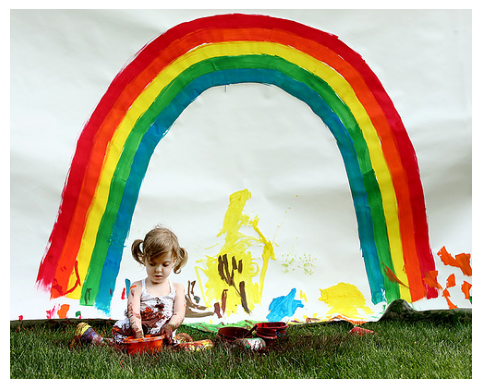

In [6]:
# Set the path to the directory containing image files
IMG_PATH = "C:/Users/Vidhi/flickr8k/Images/"

# Read the third image in the list using OpenCV (note: OpenCV loads in BGR format)
img = cv2.imread(IMG_PATH + img_list[2] + ".jpg")

# Convert the image from BGR to RGB for correct color display
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img)

# Remove axis ticks and labels
plt.axis("off")

# Show the image
plt.show()

In [7]:
descriptions[img_list[2]]

['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
 'A little girl is sitting in front of a large painted rainbow .',
 'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
 'There is a girl with pigtails sitting in front of a rainbow painting .',
 'Young girl with pigtails painting outside in the grass .']

### **Cleaning the captions** 

In [8]:
# Function to clean a caption sentence
def clean_text(sentence):
    # Convert all characters to lowercase
    sentence = sentence.lower()
    
    # Replace non-alphabet characters with a space
    sentence = re.sub("[^a-z]+", " ", sentence)
    
    # Split the sentence into individual words
    words = sentence.split()

    # Remove single-character words
    words = [w for w in words if len(w) > 1]
    
    # Join the cleaned words back into a sentence
    sentence = " ".join(words)
    
    # Return the cleaned sentence
    return sentence

In [9]:
# Iterate through each image and its captions
for key, caption_list in descriptions.items():
    # Iterate through each caption of the current image
    for i in range(len(caption_list)):
        # Clean the caption (convert to lowercase, remove punctuation, etc.)
        caption_list[i] = clean_text(caption_list[i])

### **Creating the vocablary for captions (consist of unique words of caption)**

In [10]:
# Initialize a list to hold all words
total_words = []

# Iterate through each image and its captions
for key in descriptions.keys():
    # Iterate through each caption for the current image
    for sentence in descriptions[key]:
        # Split sentence into words and add to total_words
        total_words.extend(sentence.split())

In [11]:
# Print the count of words in the 'total_words' list
print(len(total_words))

373837


In [12]:
# Count the frequency of each word in 'total_words' using Counter
counter = collections.Counter(total_words)

# Convert the counter object to a dictionary
freq_cnt = dict(counter)

# Print the number of unique words in the dataset
print(len(freq_cnt.keys()))

8424


In [13]:
# Set the frequency threshold to filter words
threshold = 10

# Filter words that appear more than the threshold
freq_cnt = [x for x in freq_cnt.items() if x[1] > threshold]

# Create a list of words that meet the frequency condition
total_words = [x[0] for x in freq_cnt]

In [14]:
# Print the count of words in the 'total_words' list
print(len(total_words))

1845


### **Extracting train and test data**

In [15]:
# Read the training image file data
train_file_data = readTextFile("Flickr_8k.trainImages.txt")

# Read the test image file data
test_file_data = readTextFile("Flickr_8k.testImages.txt")

In [16]:
# Extract image names (without file extension) from the training data
train = [row.split(".")[0] for row in train_file_data.split("\n")[:-1]]

# Extract image names (without file extension) from the test data
test = [row.split(".")[0] for row in test_file_data.split("\n")[:-1]]

* To create dictionary for train data (key: image, value: list of captions)
* Also add "start sequence" and "end sequence" in each caption of train data

In [17]:
# Initialize an empty dictionary for storing training image captions
train_descriptions = {}

# Loop through each image ID in the training set
for img_id in train:
    # Initialize an empty list to store captions for each image
    train_descriptions[img_id] = []
    
    # Loop through each caption for the current image
    for cap in descriptions[img_id]:
        # Add "startseq" and "endseq" tokens to each caption
        cap_to_append = "startseq " + cap + " endseq"
        # Append the formatted caption to the list for the current image
        train_descriptions[img_id].append(cap_to_append)

In [18]:
train_descriptions[img_list[2]]

['startseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endseq',
 'startseq little girl is sitting in front of large painted rainbow endseq',
 'startseq small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it endseq',
 'startseq there is girl with pigtails sitting in front of rainbow painting endseq',
 'startseq young girl with pigtails painting outside in the grass endseq']

To create dictionary for test data (key: image, value: list of captions)

In [19]:
# Initialize an empty dictionary for storing test image captions
test_descriptions = {}

# Loop through each image ID in the test set
for img_id in test:
    # Initialize an empty list to store captions for each image
    test_descriptions[img_id] = []
    
    # Loop through each caption for the current image
    for cap in descriptions[img_id]:
        # Append the caption directly to the list for the current image
        test_descriptions[img_id].append(cap)

#### **Creating "word to index" and "index to word" mapping for total_words (all the unique words present in the captions)**

In [20]:
# Initialize two dictionaries: one for word-to-index mapping, the other for index-to-word mapping
word_to_idx = {}
idx_to_word = {}

# Enumerate through the total words to create word-to-index and index-to-word mappings
for i, word in enumerate(total_words):
    word_to_idx[word] = i+1  # Assign index starting from 1 to each word
    idx_to_word[i+1] = word  # Reverse mapping for index to word

# Add special tokens for start and end of sequences
idx_to_word[1846] = 'startseq'
word_to_idx['startseq'] = 1846

idx_to_word[1847] = 'endseq'
word_to_idx['endseq'] = 1847

# Calculate the vocabulary size (total unique words + 1 for padding)
vocab_size = len(word_to_idx) + 1

# Print the vocabulary size
print("Vocab Size:", vocab_size)

Vocab Size: 1848


In [21]:
# Initialize a variable to keep track of the maximum caption length
max_len = 0

# Loop through each image and its associated captions in the training set
for key in train_descriptions.keys():
    for cap in train_descriptions[key]:
        # Update max_len with the longest caption found
        max_len = max(max_len, len(cap.split()))

# Print the maximum length of a caption
print("Max Length of caption:", max_len)

Max Length of caption: 35


### **Using pretrained embedding vector from "glove.6B.50d.txt"**
To store words as keys and their corresponding embedding vectors as values.

In [22]:
# Open the GloVe file containing pre-trained word embeddings
f = open('glove.6B.50d.txt', encoding='utf-8')

# Initialize an empty dictionary to store word embeddings
embedding_index = {}

# Loop through each line in the GloVe file
for line in f:
    # Split each line into word and its corresponding embeddings
    values = line.split()
    word = values[0]
    word_embeddings = np.array(values[1:], dtype='float')
    
    # Store the word and its embeddings in the dictionary
    embedding_index[word] = word_embeddings

# Close the file after processing
f.close()

In [23]:
# Function to create the embedding matrix for words in the vocabulary
def get_embedding_matrix():
    # Set the embedding dimension to 50 (from GloVe embeddings)
    emb_dim = 50
    
    # Initialize a matrix of zeros with shape (vocab_size, emb_dim)
    matrix = np.zeros((vocab_size, emb_dim))
    
    # Loop through the word-to-index dictionary
    for word, idx in word_to_idx.items():
        # Retrieve the embedding vector for the word
        embedding_vector = embedding_index.get(word)

        # If the embedding vector exists, add it to the matrix
        if embedding_vector is not None:
            matrix[idx] = embedding_vector

    # Return the completed embedding matrix
    return matrix

In [24]:
# Generate the embedding matrix using the function get_embedding_matrix()
embedding_matrix = get_embedding_matrix()

# Display the shape of the embedding matrix to verify its dimensions
embedding_matrix.shape

(1848, 50)

### **Using ResNet50 model to create feature vectors of images**

In [25]:
# Load the ResNet50 model pre-trained on ImageNet with the specified input shape
model = ResNet50(weights = "imagenet", input_shape = (224, 224, 3))

# Display the summary of the model to see the architecture details
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [26]:
# To remove the last layer to get an output vector of size (2048)
model_new = Model(model.input, model.layers[-2].output)

### **Preprocessing the image to fit the ResNet50 model**

In [27]:
# Define a function to preprocess an image for model input
def preprocess_img(img):
    # Load the image and resize it to the target size (224x224)
    img = IMG.load_img(img, target_size = (224, 224))
    
    # Convert the image to a numpy array
    img = IMG.img_to_array(img)
    
    # Add an extra dimension to the array for batch processing
    img = np.expand_dims(img, axis = 0)
    
    # Normalize the image using the preprocess_input function for ResNet50
    img = preprocess_input(img)
    
    # Return the preprocessed image
    return img

In [28]:
# Define a function to encode an image into a feature vector
def encode_image(img):
    # Preprocess the image using the preprocess_img function
    img = preprocess_img(img)
    
    # Use the model to predict the image's feature vector
    feature_vector = model_new.predict(img, verbose=0)

    # Reshape the feature vector into a 1D array
    feature_vector = feature_vector.reshape((-1,))
    
    # Return the encoded feature vector
    return feature_vector

In [30]:
encode_image(IMG_PATH + img_list[2] + ".jpg")

array([0.08419657, 0.6137519 , 0.20701599, ..., 0.        , 3.0910707 ,
       1.5620652 ], dtype=float32)

#### To get the feature vector of all the train images
Length of feature vector of each image is 2048 (i.e each images have 2048 features)

In [129]:
start = time()
encoding_train = {}

for ix,img_id in enumerate(train):
    img_path = IMG_PATH + img_id + ".jpg"
    encoding_train[img_id] = encode_image(img_path)

    if ix%100 == 0:
        print("Encoding in Progress Time step %d "%ix)

end_t = time()
print("Total time taken :", end_t-start)

Encoding in Progress Time step 0 
Encoding in Progress Time step 100 
Encoding in Progress Time step 200 
Encoding in Progress Time step 300 
Encoding in Progress Time step 400 
Encoding in Progress Time step 500 
Encoding in Progress Time step 600 
Encoding in Progress Time step 700 
Encoding in Progress Time step 800 
Encoding in Progress Time step 900 
Encoding in Progress Time step 1000 
Encoding in Progress Time step 1100 
Encoding in Progress Time step 1200 
Encoding in Progress Time step 1300 
Encoding in Progress Time step 1400 
Encoding in Progress Time step 1500 
Encoding in Progress Time step 1600 
Encoding in Progress Time step 1700 
Encoding in Progress Time step 1800 
Encoding in Progress Time step 1900 
Encoding in Progress Time step 2000 
Encoding in Progress Time step 2100 
Encoding in Progress Time step 2200 
Encoding in Progress Time step 2300 
Encoding in Progress Time step 2400 
Encoding in Progress Time step 2500 
Encoding in Progress Time step 2600 
Encoding in P

To save the feature vector of train images in a file

In [130]:
!mkdir saved

with open("saved/encoded_train_features.pkl", "wb") as f:
    pickle.dump(encoding_train, f)

#### To get the feature vector of all the test images

In [33]:
start = time()
encoding_test = {}

for ix,img_id in enumerate(test):
    img_path = IMG_PATH + img_id + ".jpg"
    encoding_test[img_id] = encode_image(img_path)

    if ix%100 == 0:
        print("Encoding in Progress Time step %d "%ix)

end_t = time()
print("Total time taken :", end_t-start)

Encoding in Progress Time step 0 
Encoding in Progress Time step 100 
Encoding in Progress Time step 200 
Encoding in Progress Time step 300 
Encoding in Progress Time step 400 
Encoding in Progress Time step 500 
Encoding in Progress Time step 600 
Encoding in Progress Time step 700 
Encoding in Progress Time step 800 
Encoding in Progress Time step 900 
Total time taken : 294.7579755783081


To save the feature vector of test images in a file

In [35]:
with open("saved/encoded_test_features.pkl", "wb") as f:
    pickle.dump(encoding_test, f)

#### To get the feature vector of train and test images from the file

In [29]:
with open("saved/encoded_train_features.pkl", "rb") as f:
    encoding_train = pickle.load(f)

with open("saved/encoded_test_features.pkl", "rb") as f:
    encoding_test = pickle.load(f)

### **Data generator (to create dataset)**

In [30]:
# Generator function to yield batches of training data for model training
def data_generator(train_descriptions, encoding_train, word_to_idx, max_len, batch_size):
    
    # Initialize input and output lists
    X1, X2, y = [], [], []
    n = 0  # Counter for batch size

    while True:  # Infinite loop to generate data continuously
        for key, desc_list in train_descriptions.items():
            n += 1  # Increment image counter
            photo = encoding_train[key]  # Get image feature vector
            
            for desc in desc_list:
                # Convert caption words to their corresponding indices
                seq = [word_to_idx[word] for word in desc.split() if word in word_to_idx]
                
                for i in range(1, len(seq)):
                    # Create input-output pair for each word in caption
                    xi = seq[0:i]  # Input sequence
                    yi = seq[i]    # Output word

                    # Pad input sequence to max length
                    xi = pad_sequences([xi], maxlen=max_len, value=0, padding='post')[0]
                    # Convert output word to one-hot encoded vector
                    yi = to_categorical([yi], num_classes=vocab_size)[0]

                    # Append image feature, padded input sequence, and target word
                    X1.append(photo)
                    X2.append(xi)
                    y.append(yi)

                # When batch is full, yield the data and reset
                if n == batch_size:
                    yield ((np.array(X1), np.array(X2)), np.array(y))
                    X1, X2, y = [], [], []
                    n = 0

### **LSTM Model Training**

In [31]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, BatchNormalization, Concatenate
from keras.utils import plot_model

# Input layer for image features of size 2048
input_img_features = Input(shape=(2048,))

# Apply dropout to reduce overfitting
inp_img1 = Dropout(0.5)(input_img_features)

# Fully connected dense layer to reduce dimension
inp_img2 = Dense(256, activation='relu')(inp_img1)

# Normalize activations to stabilize learning
inp_img2 = BatchNormalization()(inp_img2)  

# Input layer for caption sequences of length max_len
input_captions = Input(shape=(max_len,))

# Embedding layer to convert words into vectors
inp_cap1 = Embedding(input_dim=vocab_size, output_dim=50, mask_zero=True)(input_captions)

# Dropout to prevent overfitting in caption branch
inp_cap2 = Dropout(0.5)(inp_cap1)

# LSTM layer to process the embedded caption sequence
inp_cap3 = LSTM(512, return_sequences=False)(inp_cap2)

# Batch normalization to stabilize training
inp_cap3 = BatchNormalization()(inp_cap3)  

# Combine image and caption features using Concatenate
decoder1 = Concatenate()([inp_img2, inp_cap3])  # Output shape: (256 + 512,)

# Fully connected dense layer after fusion
decoder2 = Dense(256, activation='relu')(decoder1)

# Output layer with softmax to predict next word
outputs = Dense(vocab_size, activation='softmax')(decoder2)

# Define the complete model with image and caption inputs
model = Model(inputs=[input_img_features, input_captions], outputs=outputs)

# Set pretrained GloVe embeddings in the embedding layer
model.layers[2].set_weights([embedding_matrix])

# Freeze embedding layer to prevent training
model.layers[2].trainable = False

# Compile model using categorical crossentropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Visualize the model architecture with layer shapes
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 35)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 35, 50)    │     92,400 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 2048)      │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 35, 50)    │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 35)        │          0 │ input_layer_2[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    524,544 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 512)       │  1,153,024 │ dropout_1[0][0],  │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256)       │      1,024 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ lstm[0][0]        │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 768)       │          0 │ batch_normalizat… │
│ (Concatenate)       │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │    196,864 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1848)      │    474,936 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,444,840 (9.33 MB)

 Trainable params: 2,350,904 (8.97 MB)

 Non-trainable params: 93,936 (366.94 KB)

In [32]:
# Assume you have the full image encoding dictionary
all_encodings = encoding_train  # this should include ALL images, not just training

# --- Step 1: Split into training and validation sets ---
# Filter image filenames to those with encodings
available_imgs = list(set(train_descriptions.keys()) & set(all_encodings.keys()))

# Now do the train/val split only on available images
train_imgs, val_imgs = train_test_split(available_imgs, test_size=0.1, random_state=42)

train_descriptions = {img: train_descriptions[img] for img in train_imgs}
encoding_train = {img: all_encodings[img] for img in train_imgs}

val_descriptions = {img: descriptions[img] for img in val_imgs}
encoding_val = {img: all_encodings[img] for img in val_imgs}

# --- Step 2: Training Setup with Early Stopping and Checkpointing ---
# Create directory to save model checkpoints
os.makedirs('./model_weights', exist_ok=True)

# Hyperparameters
epochs = 100
batch_size = 64
steps = len(train_descriptions) // batch_size
val_steps = len(val_descriptions) // batch_size

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    filepath='./model_weights/best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# --- Step 3: Train Function ---
def train():
    train_generator = data_generator(train_descriptions, encoding_train, word_to_idx, max_len, batch_size)
    val_generator = data_generator(val_descriptions, encoding_val, word_to_idx, max_len, batch_size)

    model.fit(
        train_generator,
        epochs=epochs,
        steps_per_epoch=steps,
        validation_data=val_generator,
        validation_steps=val_steps,
        callbacks=[early_stopping, checkpoint],
        verbose=1
    )

In [36]:
train()

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - loss: 5.5504 
Epoch 1: val_loss improved from inf to 5.56016, saving model to ./model_weights/best_model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 875s 12s/step - loss: 5.5415 - val_loss: 5.5602
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - loss: 4.1027 
Epoch 2: val_loss improved from 5.56016 to 5.27768, saving model to ./model_weights/best_model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 880s 12s/step - loss: 4.1013 - val_loss: 5.2777
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - loss: 3.7609 
Epoch 3: val_loss improved from 5.27768 to 4.89060, saving model to ./model_weights/best_model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 876s 12s/step - loss: 3.7600 - val_loss: 4.8906
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - loss: 3.5551 
Epoch 4: val_loss improved from 4.89060 to 4.47919, saving model to ./model_weights/best_model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 874s 12s/step - loss: 3.5544 - val_loss: 4.4792
Epoch 5/100
75/75 ━━━━━━━━━━━━━━

### **Predicting and displaying captions for the images**

In [33]:
# Load the trained model
model = load_model('./model_weights/best_model.keras')

In [34]:
# Define function to predict and display caption for an image
def predict_caption(img_filename, encoding_test, test_descriptions):

    # Check if image feature exists in encoding dictionary
    if img_filename not in encoding_test:
        print(f"Image '{img_filename}' not found in encoding_test.")
        return
    
    # Retrieve and reshape feature vector for the image
    feature_vector = encoding_test[img_filename].reshape((1, 2048))

    # Start caption generation with start token
    in_text = "startseq"
    for _ in range(max_len):
        # Convert current text to sequence of word indices
        sequence = [word_to_idx.get(w, 0) for w in in_text.split()]
        # Pad the sequence to match max_len
        sequence = pad_sequences([sequence], maxlen=max_len, padding='post')
        # Predict next word using the model
        ypred = model.predict([feature_vector, sequence], verbose=0)
        # Get the index with highest probability
        ypred = ypred.argmax()
        # Map index to word
        word = idx_to_word.get(ypred, "")
        # Append word to the current caption
        in_text += " " + word
        # Stop if end token is generated
        if word == "endseq":
            break

    # Remove start and end tokens from final caption
    final_caption = ' '.join(in_text.split()[1:-1])

    # Construct image path and load image
    img_path = IMG_PATH + img_filename + ".jpg" # Adjust if needed
    img = plt.imread(img_path)
    # Display the image
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    # Print generated caption
    print("Predicted Caption:", final_caption)
    
    # Print original test captions for comparison, if available
    if img_filename in test_descriptions:
        print("\nOriginal Captions:")
        for i, caption in enumerate(test_descriptions[img_filename]):
            print(f"{i+1}. {caption}")
    else:
        print("No original captions found for this image.")

### **Predicting the captions of some test images**

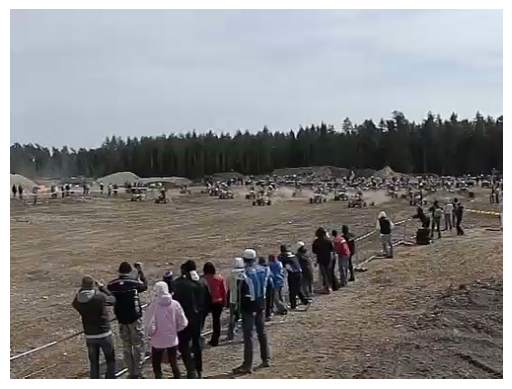

Predicted Caption: group of people are walking down the road

Original Captions:
1. crowd watching dirt bike race
2. group of people on the sidelines of an atv race
3. line of people staring at the vehicles on the dirt track
4. line of spectators at race
5. people standing at fence watching motor vehicles in field


In [71]:
img_id1 = list(test_descriptions.keys())[70]
predict_caption(img_id1, encoding_test, test_descriptions)

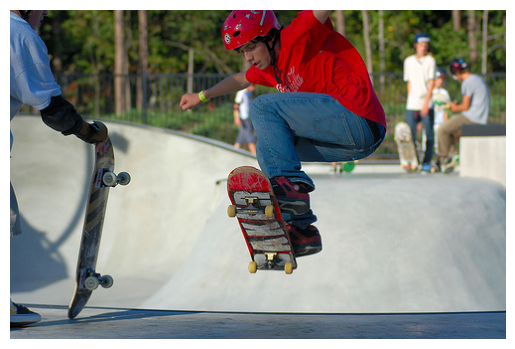

Predicted Caption: boy in red shirt is riding skateboard down ramp

Original Captions:
1. man wearing red helmet jumps up while riding skateboard
2. young man wearing red jacket performs jump on red skateboard
3. the helmeted boy is doing stunt on skateboard
4. the young man is skateboarding at skate park
5. young man is performing trick on skateboard in park


In [72]:
img_id2 = list(test_descriptions.keys())[23]
predict_caption(img_id2, encoding_test, test_descriptions)

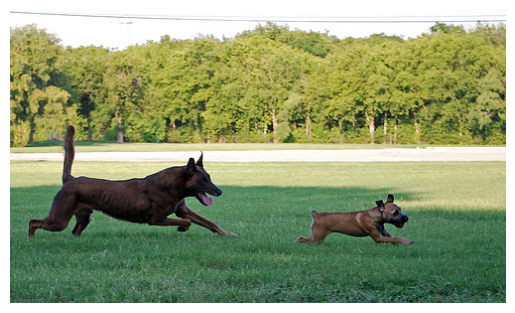

Predicted Caption: two dogs running through field

Original Captions:
1. big dog chases little dog on the grass
2. black dog is chasing smaller brown dog over grass
3. the large brown dog is chasing after the little brown dog
4. two brown dogs run through the grass together
5. two dogs play in the grass


In [73]:
img_id3 = list(test_descriptions.keys())[18]
predict_caption(img_id3, encoding_test, test_descriptions)

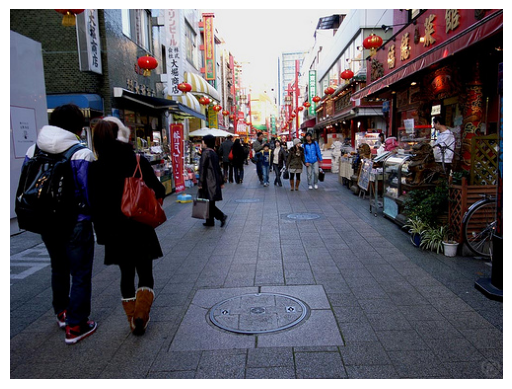

Predicted Caption: people walking down city street

Original Captions:
1. busy city street with many people walking along it
2. couple walk to the side of crowded walkway
3. chinese market street in the winter time
4. people walk down paved street that has red lanterns hung from the buildings
5. people walking down street lined with chinese lanterns


In [74]:
img_id4 = list(test_descriptions.keys())[25]
predict_caption(img_id4, encoding_test, test_descriptions)

### **Calculating the BLUE-Score**
BLEU score (Bilingual Evaluation Understudy) is a metric used to evaluate the quality of machine-generated text.

In [39]:
def generate_desc(model, photo, word_to_idx, max_len):
    # Start with the initial token
    in_text = 'startseq'
    
    # Iterate over the whole length of the sequence
    for _ in range(max_len):
        # Integer encode input sequence
        sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        # Pad input
        sequence = pad_sequences([sequence], maxlen=max_len)
        # Predict next word
        yhat = model.predict([photo.reshape(1, 2048), sequence], verbose=0)
        # Convert probability to integer
        yhat = np.argmax(yhat)
        # Map integer to word
        word = idx_to_word[yhat]
        # Stop if we cannot map the word
        if word is None:
            break
        # Append as input for generating the next word
        in_text += ' ' + word
        # Stop if we predict the end of the sequence
        if word == 'endseq':
            break
    
    # Remove startseq and endseq
    final = in_text.split()
    final = final[1:-1]
    return ' '.join(final)

In [40]:
def evaluate_model(model, descriptions, photos, word_to_idx, max_len, sample_size=None):
    actual, predicted = [], []
    smoothie = SmoothingFunction().method4  # Smoothing for short sentences
    
    # Convert to list to allow sampling
    keys = list(descriptions.keys())
    if sample_size:
        keys = keys[:sample_size]
    
    for key in keys:
        if key not in photos:
            continue
            
        try:
            # Generate caption
            yhat = generate_desc(model, photos[key], word_to_idx, max_len)
            
            # Get references
            desc_list = descriptions[key]
            references = [d.split() for d in desc_list]
            
            # Filter empty references
            references = [ref for ref in references if len(ref) > 0]
            if not references:
                continue
                
            # Filter empty predictions
            yhat_words = yhat.split()
            if not yhat_words:
                continue
                
            # Store for BLEU calculation
            actual.append(references)
            predicted.append(yhat_words)
            
        except Exception as e:
            print(f"Error processing {key}: {str(e)}")
            continue
    
    # Calculate BLEU scores with smoothing
    bleu1 = corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0), smoothing_function=smoothie)
    bleu2 = corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothie)
    bleu3 = corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0), smoothing_function=smoothie)
    bleu4 = corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smoothie)
    
    print(f"BLEU-1: {bleu1:.4f}")
    print(f"BLEU-2: {bleu2:.4f}")
    print(f"BLEU-3: {bleu3:.4f}")
    print(f"BLEU-4: {bleu4:.4f}")
    print(f"Evaluated on {len(actual)} samples")
    
    return bleu1, bleu2, bleu3, bleu4

In [41]:
# Run the evaluation
evaluate_model(model, test_descriptions, encoding_test, word_to_idx, max_len)

BLEU-1: 0.5064
BLEU-2: 0.3054
BLEU-3: 0.2110
BLEU-4: 0.0974
Evaluated on 1000 samples


(0.5064315812818807,
 0.30543416333290674,
 0.21104311419986652,
 0.09743920563864426)